In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


Matplotlib is building the font cache; this may take a moment.


### Loading data

In [19]:
admission_data = pd.read_csv('datasets/HDHI-Admission data.csv')

### Data Cleaning

In [38]:
# Display first few rows of the dataset
#print(admission_data.head())

# Check for missing values
print(admission_data.isnull().sum())

admission_data.replace('EMPTY', np.nan, inplace=True)
admission_data.replace('N/A', np.nan, inplace=True)
admission_data.replace('\\', np.nan, inplace=True)

# Fill missing values in numeric columns with the column mean
numeric_columns = admission_data.select_dtypes(include=[np.number]).columns
admission_data[numeric_columns] = admission_data[numeric_columns].fillna(admission_data[numeric_columns].mean())

# For non-numeric columns, you can fill missing values with a placeholder or the mode
categorical_columns = admission_data.select_dtypes(include=[object]).columns
for col in categorical_columns:
    admission_data[col] = admission_data[col].fillna(admission_data[col].mode()[0])

SNO                                0
MRD No.                            0
D.O.A                              0
D.O.D                              0
AGE                                0
GENDER                             0
RURAL                              0
TYPE OF ADMISSION-EMERGENCY/OPD    0
month year                         0
DURATION OF STAY                   0
duration of intensive unit stay    0
OUTCOME                            0
SMOKING                            0
ALCOHOL                            0
DM                                 0
HTN                                0
CAD                                0
PRIOR CMP                          0
CKD                                0
HB                                 0
TLC                                0
PLATELETS                          0
GLUCOSE                            0
UREA                               0
CREATININE                         0
BNP                                0
RAISED CARDIAC ENZYMES             0
E

In [39]:
print(admission_data.isnull().sum())

SNO                                0
MRD No.                            0
D.O.A                              0
D.O.D                              0
AGE                                0
GENDER                             0
RURAL                              0
TYPE OF ADMISSION-EMERGENCY/OPD    0
month year                         0
DURATION OF STAY                   0
duration of intensive unit stay    0
OUTCOME                            0
SMOKING                            0
ALCOHOL                            0
DM                                 0
HTN                                0
CAD                                0
PRIOR CMP                          0
CKD                                0
HB                                 0
TLC                                0
PLATELETS                          0
GLUCOSE                            0
UREA                               0
CREATININE                         0
BNP                                0
RAISED CARDIAC ENZYMES             0
E

In [40]:
# Example of creating a new feature from existing ones (if applicable)
admission_data['AGE_GROUP'] = pd.cut(admission_data['AGE'], bins=[0, 18, 35, 50, 65, 80, 100], labels=['0-18', '19-35', '36-50', '51-65', '66-80', '81-100'])


In [41]:
# Encode categorical variables
label_encoder = LabelEncoder()

categorical_columns = ['GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'OUTCOME', 'AGE_GROUP']
for col in categorical_columns:
    admission_data[col] = label_encoder.fit_transform(admission_data[col])


In [42]:
# Define features (X) and target variable (y)
X = admission_data.drop(columns=['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'DURATION OF STAY','month year'])
y = admission_data['DURATION OF STAY']


In [43]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# Initialize and train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Mean Squared Error: 8.389515118593133
R-squared: 0.6753178962934359


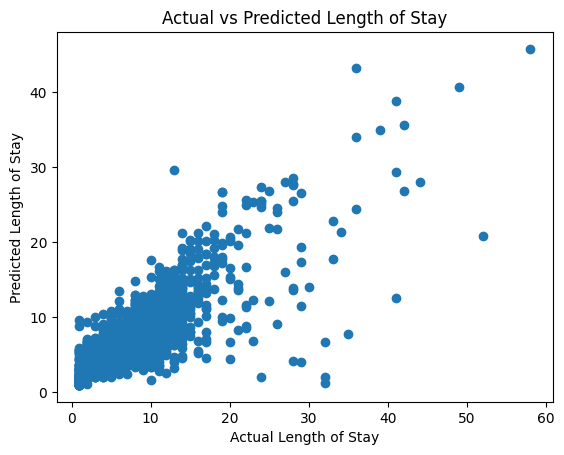

In [45]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Length of Stay")
plt.ylabel("Predicted Length of Stay")
plt.title("Actual vs Predicted Length of Stay")
plt.show()


In [51]:
# New record for prediction
new_record = pd.DataFrame({
    'AGE': [30],
    'GENDER': [1],  # Assuming 1 for male
    'RURAL': [0],  # Assuming 0 for urban
    'DURATION OF STAY': [2],
    'SMOKING': [0],
    'ALCOHOL': [1],
    'DM': [0],
    'HTN': [1]
})

# Make the prediction
predicted_duration = model.predict(new_record)
print(f"Predicted Length of Stay: {predicted_duration[0]}")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- DURATION OF INTENSIVE UNIT STAY
- SMOKING
Feature names seen at fit time, yet now missing:
- ACS
- AF
- AGE_GROUP
- AKI
- ANAEMIA
- ...
